# Linear Regression in Python with Scikit-Learn

This notebook is a tutorial for a basic supervied learning technique which is a linear regression. The dataset is a record of 7 common different fish species. I will use  this dataset to perform a predective model that estimates the weight of a fish using  a linear and multilinear regression.

### 1. Importing libraries 

In [55]:
import numpy as np
import pandas as pd #library for analyzing data

import matplotlib.pyplot as plt #data visualization 
import seaborn as sns 

from sklearn.linear_model import LinearRegression #sklearn is a machine learning library 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

### 2. Importing the data 

In [56]:
df = pd.read_csv('Fish.csv') # importation via pandas

### 3. Understand the data 

In [57]:
df.shape #it returns the dimension of the dataset (rows, columns)

(159, 7)

In [58]:
df.head() # by default, head dunction shows the first 5 rows. to show n rows, we type : df.head(n)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [60]:
df.describe() #for every feature it returns : count, mean, standar deviation, minimmum and maximumvalue, and quantiles

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Since it's illogic to have fish with null weight, we will drop zero weighted fishes. 

In [61]:
df.drop(df[df['Weight'] == 0].index, inplace = True)

In [62]:
df.shape

(158, 7)

Now, we will try to understand if there is a strong linear relationship between independent variables and the dependent variable using linear correlation.

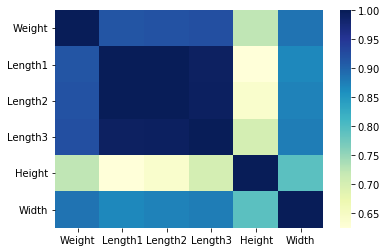

In [63]:
sns.heatmap(df.corr(), cmap="YlGnBu")

We conclude that we have a strong positive linear correlation (>50%) between independent variables and the dependent variable. 

In [64]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


### 4. Predicting model 
#### 4.1 Simple linear regression :
We will choose the most correlated variable to the dependent variable, which is length3. 

In [65]:
X=df.iloc[:,-3:-2].values
Y=df.iloc[:,1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lr = LinearRegression().fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

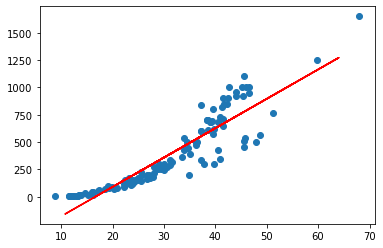

In [66]:
plt.scatter(X_train[:,-1],Y_train)
plt.plot(X_test[:,-1],Y_pred, color='red')
plt.show()

In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Absolute Error:', np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))

Mean Absolute Error: 115.35876788600387
Mean Squared Error: 23392.01227763184
Root Mean Absolute Error: 10.74051990762104


In [68]:
r2 = r2_score(Y_test,Y_pred)
print("R2 score: "+str(r2))

R2 score: 0.8699372514341569


#### 4.2 Multilinear regression
Here, we will exploit all the continous variables to perform a multilinear regression. 

In [69]:
X=df.iloc[:,2:].values
Y=df.iloc[:,1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lr = LinearRegression().fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Absolute Error:', np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))

Mean Absolute Error: 113.08028303908922
Mean Squared Error: 31561.77306754145
Root Mean Absolute Error: 10.633921338767239


In [71]:
r2 = r2_score(Y_test,Y_pred)
print("R2 score: "+str(r2))

R2 score: 0.8245122776931346


We got nearly the same results and ever a little bit worser. What I can conclude is that introducing the other variables, add an instability in the prediction due to the lack of a perfect multicollinearity between the input variables.

#### 4.3 Linear regression with exploration of a categorical variable :

In machine learning, the two most popular techniques  that are used to explore categorical data and transferring it to numeric variables  are: 
- Ordinal encoding: used in the case that the categorical variable has a natural ordering of values. like the place in a competition (first, second, ...) Basically here, we assign integers to labels in the order that we specify. 
- One-hot encoding: used for categorical variables where no ordinal relationship exists. like colors (red, green, yellow). Here, a new binary variable is added for each unique integer value in the variable. For example, for the “color” variable there are three categories, and, therefore, three binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

In our case, since there is no ordinal relationship between species' values, we will use the one-hot encoding.

In [72]:
fish = pd.get_dummies(df,columns=["Species"])  #Converting Categorical Data with one-hot encoding
fish.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [73]:
X=fish.iloc[:,3:].values
Y=fish.iloc[:,0].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lr = LinearRegression().fit(X_train, Y_train)
Y2= lr.predict(X_test)

In [74]:
r2 = r2_score(Y_test,Y2)
print("R2 score: "+str(r2))

R2 score: 0.8801825706868254


The exploitation of the categorical variable enhances the results. So we conclude that species have an impact on the fish's weights. 



The final R2 score which we got is High : 88% of the weight's variance is explained by all the independent variables. Which means that our model is working fine.
